# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

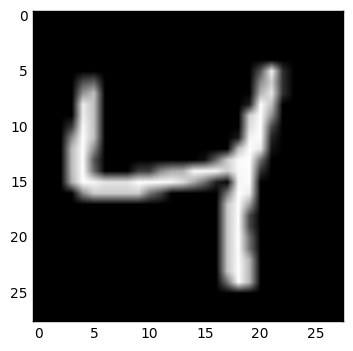

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
mnist.train.images.shape

(60000, 784)

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size))
targets_ = tf.placeholder(tf.float32, shape=(None, image_size))

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=tf.nn.relu)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [ ]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7080
Epoch: 1/20... Training loss: 0.7044
Epoch: 1/20... Training loss: 0.7019
Epoch: 1/20... Training loss: 0.6996
Epoch: 1/20... Training loss: 0.6980
Epoch: 1/20... Training loss: 0.6970
Epoch: 1/20... Training loss: 0.6960
Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
E

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
E

Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6924
Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6924
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6921
Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6921
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6924
Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6925
Epoch: 2/20... Training loss: 0.6926
Epoch: 2/20... Training loss: 0.6921
Epoch: 2/20... Training loss: 0.6923
Epoch: 2/20... Training loss: 0.6921
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6921
Epoch: 2/20... Training loss: 0.6922
Epoch: 2/20... Training loss: 0.6924
Epoch: 2/20... Training loss: 0.6923
E

Epoch: 3/20... Training loss: 0.6903
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6908
Epoch: 3/20... Training loss: 0.6906
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6901
Epoch: 3/20... Training loss: 0.6912
Epoch: 3/20... Training loss: 0.6914
Epoch: 3/20... Training loss: 0.6905
Epoch: 3/20... Training loss: 0.6908
Epoch: 3/20... Training loss: 0.6909
Epoch: 3/20... Training loss: 0.6911
Epoch: 3/20... Training loss: 0.6905
Epoch: 3/20... Training loss: 0.6899
Epoch: 3/20... Training loss: 0.6906
Epoch: 3/20... Training loss: 0.6905
Epoch: 3/20... Training loss: 0.6900
Epoch: 3/20... Training loss: 0.6906
Epoch: 3/20... Training loss: 0.6908
Epoch: 3/20... Training loss: 0.6906
Epoch: 3/20... Training loss: 0.6904
Epoch: 3/20... Training loss: 0.6905
Epoch: 3/20... Training loss: 0.6906
Epoch: 3/20... Training loss: 0.6911
E

Epoch: 4/20... Training loss: 0.6902
Epoch: 4/20... Training loss: 0.6901
Epoch: 4/20... Training loss: 0.6905
Epoch: 4/20... Training loss: 0.6896
Epoch: 4/20... Training loss: 0.6904
Epoch: 4/20... Training loss: 0.6909
Epoch: 4/20... Training loss: 0.6903
Epoch: 4/20... Training loss: 0.6899
Epoch: 4/20... Training loss: 0.6898
Epoch: 4/20... Training loss: 0.6906
Epoch: 4/20... Training loss: 0.6900
Epoch: 4/20... Training loss: 0.6897
Epoch: 4/20... Training loss: 0.6901
Epoch: 4/20... Training loss: 0.6901
Epoch: 4/20... Training loss: 0.6902
Epoch: 4/20... Training loss: 0.6905
Epoch: 4/20... Training loss: 0.6897
Epoch: 4/20... Training loss: 0.6900
Epoch: 4/20... Training loss: 0.6899
Epoch: 4/20... Training loss: 0.6900
Epoch: 4/20... Training loss: 0.6900
Epoch: 4/20... Training loss: 0.6900
Epoch: 4/20... Training loss: 0.6905
Epoch: 4/20... Training loss: 0.6899
Epoch: 4/20... Training loss: 0.6901
Epoch: 4/20... Training loss: 0.6899
Epoch: 4/20... Training loss: 0.6901
E

Epoch: 4/20... Training loss: 0.6898
Epoch: 4/20... Training loss: 0.6895
Epoch: 4/20... Training loss: 0.6897
Epoch: 4/20... Training loss: 0.6887
Epoch: 4/20... Training loss: 0.6892
Epoch: 4/20... Training loss: 0.6890
Epoch: 4/20... Training loss: 0.6894
Epoch: 4/20... Training loss: 0.6893
Epoch: 4/20... Training loss: 0.6896
Epoch: 4/20... Training loss: 0.6882
Epoch: 4/20... Training loss: 0.6886
Epoch: 4/20... Training loss: 0.6890
Epoch: 4/20... Training loss: 0.6893
Epoch: 4/20... Training loss: 0.6890
Epoch: 4/20... Training loss: 0.6891
Epoch: 4/20... Training loss: 0.6894
Epoch: 4/20... Training loss: 0.6886
Epoch: 4/20... Training loss: 0.6881
Epoch: 4/20... Training loss: 0.6890
Epoch: 4/20... Training loss: 0.6892
Epoch: 4/20... Training loss: 0.6885
Epoch: 5/20... Training loss: 0.6877
Epoch: 5/20... Training loss: 0.6884
Epoch: 5/20... Training loss: 0.6884
Epoch: 5/20... Training loss: 0.6884
Epoch: 5/20... Training loss: 0.6880
Epoch: 5/20... Training loss: 0.6885
E

Epoch: 5/20... Training loss: 0.6809
Epoch: 5/20... Training loss: 0.6802
Epoch: 5/20... Training loss: 0.6808
Epoch: 5/20... Training loss: 0.6800
Epoch: 5/20... Training loss: 0.6781
Epoch: 5/20... Training loss: 0.6800
Epoch: 5/20... Training loss: 0.6792
Epoch: 5/20... Training loss: 0.6804
Epoch: 5/20... Training loss: 0.6811
Epoch: 5/20... Training loss: 0.6805
Epoch: 5/20... Training loss: 0.6814
Epoch: 5/20... Training loss: 0.6797
Epoch: 5/20... Training loss: 0.6795
Epoch: 5/20... Training loss: 0.6802
Epoch: 5/20... Training loss: 0.6789
Epoch: 5/20... Training loss: 0.6808
Epoch: 5/20... Training loss: 0.6800
Epoch: 5/20... Training loss: 0.6809
Epoch: 5/20... Training loss: 0.6799
Epoch: 5/20... Training loss: 0.6797
Epoch: 5/20... Training loss: 0.6786
Epoch: 5/20... Training loss: 0.6802
Epoch: 5/20... Training loss: 0.6802
Epoch: 5/20... Training loss: 0.6808
Epoch: 5/20... Training loss: 0.6794
Epoch: 5/20... Training loss: 0.6806
Epoch: 5/20... Training loss: 0.6799
E

Epoch: 6/20... Training loss: 0.6756
Epoch: 6/20... Training loss: 0.6752
Epoch: 6/20... Training loss: 0.6746
Epoch: 6/20... Training loss: 0.6754
Epoch: 6/20... Training loss: 0.6755
Epoch: 6/20... Training loss: 0.6740
Epoch: 6/20... Training loss: 0.6744
Epoch: 6/20... Training loss: 0.6761
Epoch: 6/20... Training loss: 0.6748
Epoch: 6/20... Training loss: 0.6746
Epoch: 6/20... Training loss: 0.6749
Epoch: 6/20... Training loss: 0.6758
Epoch: 6/20... Training loss: 0.6759
Epoch: 6/20... Training loss: 0.6739
Epoch: 6/20... Training loss: 0.6750
Epoch: 6/20... Training loss: 0.6756
Epoch: 6/20... Training loss: 0.6744
Epoch: 6/20... Training loss: 0.6734
Epoch: 6/20... Training loss: 0.6730
Epoch: 6/20... Training loss: 0.6752
Epoch: 6/20... Training loss: 0.6746
Epoch: 6/20... Training loss: 0.6736
Epoch: 6/20... Training loss: 0.6735
Epoch: 6/20... Training loss: 0.6759
Epoch: 6/20... Training loss: 0.6734
Epoch: 6/20... Training loss: 0.6752
Epoch: 6/20... Training loss: 0.6741
E

Epoch: 7/20... Training loss: 0.6719
Epoch: 7/20... Training loss: 0.6718
Epoch: 7/20... Training loss: 0.6715
Epoch: 7/20... Training loss: 0.6732
Epoch: 7/20... Training loss: 0.6701
Epoch: 7/20... Training loss: 0.6722
Epoch: 7/20... Training loss: 0.6703
Epoch: 7/20... Training loss: 0.6711
Epoch: 7/20... Training loss: 0.6724
Epoch: 7/20... Training loss: 0.6714
Epoch: 7/20... Training loss: 0.6724
Epoch: 7/20... Training loss: 0.6712
Epoch: 7/20... Training loss: 0.6706
Epoch: 7/20... Training loss: 0.6699
Epoch: 7/20... Training loss: 0.6708
Epoch: 7/20... Training loss: 0.6714
Epoch: 7/20... Training loss: 0.6711
Epoch: 7/20... Training loss: 0.6699
Epoch: 7/20... Training loss: 0.6724
Epoch: 7/20... Training loss: 0.6719
Epoch: 7/20... Training loss: 0.6729
Epoch: 7/20... Training loss: 0.6702
Epoch: 7/20... Training loss: 0.6718
Epoch: 7/20... Training loss: 0.6716
Epoch: 7/20... Training loss: 0.6711
Epoch: 7/20... Training loss: 0.6709
Epoch: 7/20... Training loss: 0.6712
E

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.